In [13]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
from tqdm.auto import tqdm
from IPython.display import clear_output

In [5]:
root_dir = '/home/lab38/images/딸기_해충'

In [6]:
images = os.listdir(root_dir)
print(images.__len__())

185


In [7]:
img_list = []
grow = []

# Image Selecting

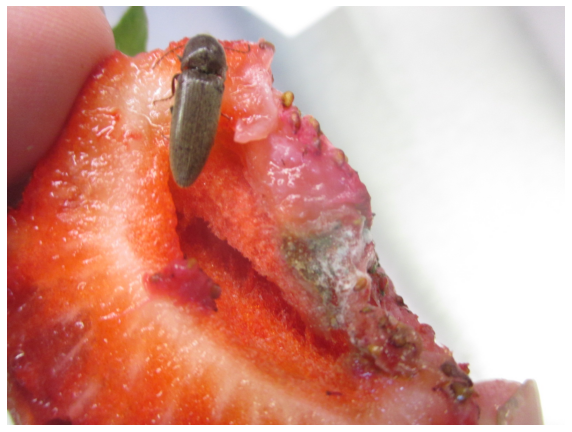

KeyboardInterrupt: Interrupted by user

In [15]:
for image in images :
    path = os.path.join(root_dir, image)
    img = plt.imread(path)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    while True :
        c = input('학습에 사용할 이미지면 y :')
        if c=='y':
            img_list.append(image)
            grow.append(input('성장단계 1~5: '))
            break
        elif c=='n' :
            break
        else: 
            print('Typo!') 
    clear_output(wait=True)

In [ ]:
result = pd.DataFrame({'image' : img_list,
                      'grow' : grow})
print(result.__len__())
result.head()

In [ ]:
import albumentations as A

transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.OneOf([
        A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    ], p=0.8)
])

In [ ]:
root_dir = '/home/lab38/images/딸기_해충'
folder_dir = '/home/lab38/딸기'

aug_img_list = []
aug_grow = []

for idx, img_name in enumerate(tqdm(result['image'])):
    from_dir = os.path.join(root_dir, img_name)
    
    img = plt.imread(from_dir)
    img = cv2.resize(img, dsize=(320,320))
    plt.imsave(os.path.join(folder_dir, img_name), img)
    grow_label = result.loc[idx, 'grow']
    
    # augmentation
    for i in range(3) :
        aug_img = transform(image=img)
        aug_img = aug_img['image']
        aug_img_name = img_name.split('.')[0]+'_a'+str(i)+'.'+img_name.split('.')[-1]
        
        # labeling
        aug_img_list.append(aug_img_name)
        aug_grow.append(grow_label)
        
        #img save
        plt.imsave(os.path.join(folder_dir, aug_img_name), aug_img)

In [ ]:
total_img = result['image'].to_list() + aug_img_list
print(len(total_img))
total_grow = result['grow'].to_list() + aug_grow
print(len(total_grow))

In [ ]:
aug_result = pd.DataFrame({'image' : total_img,
                      'grow' : total_grow})
print(aug_result.__len__())
aug_result.head()

In [ ]:
aug_result['image'] = aug_result['image'].map(lambda x: os.path.join(folder_dir, x))
aug_result['disease'] = 12
aug_result.head()

In [8]:
straw = pd.read_csv('/home/lab38/Multi_proj_6/data/strawberry_smallsizeimg.csv')
straw.head()

,image,disease,area,grow,points,original,disease-grow
0,/home/lab38/딸기/V006_77_0_00_04_01_13_0_b02_202...,0,1,5,"[{'xtl': 1003, 'ytl': 1167, 'xbr': 2255, 'ybr'...",NaN,0-5
1,/home/lab38/딸기/V006_77_0_00_04_01_13_0_b02_202...,0,1,5,"[{'xtl': 1003, 'ytl': 1217, 'xbr': 2503, 'ybr'...",NaN,0-5
2,/home/lab38/딸기/V006_77_0_00_04_01_13_0_b02_202...,0,1,5,"[{'xtl': 370, 'ytl': 884, 'xbr': 1994, 'ybr': ...",NaN,0-5
3,/home/lab38/딸기/V006_77_0_00_04_01_13_0_b02_202...,0,1,5,"[{'xtl': 739, 'ytl': 1184, 'xbr': 2176, 'ybr':...",NaN,0-5
4,/home/lab38/딸기/V006_77_0_00_04_01_13_0_b02_202...,0,1,5,"[{'xtl': 1031, 'ytl': 1271, 'xbr': 2425, 'ybr'...",NaN,0-5


In [ ]:
straw['grow'].unique()

In [ ]:
check!!!!!!!!
원래 df의 unique가 1~5인지!

In [ ]:
new_straw = pd.concat([aug_result, lettu])
new_lettu.head(-5)

In [ ]:
new_straw.to_csv('/home/lab38/Multi_proj_6/data/straw_smallsizeimg_with_pest.csv', index=False)